#### Advanced Statistics for Data Science (Spring 2022)
# Home Assignment 3
#### Topics:
- Statistical Estimation
- Hypothesis Testing in one and two samples
- ANOVA

#### Due: 23/05/2023 by 18:30

#### Instructions:
- Write your name, Student ID, and date in the cell below. 
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding excercises.
- For theoretic excercises, you can either write your solution in the notebook using $\LaTeX$ or submit additional notes.

<hr>
<hr>


**Name**: 

**Student ID**:

**Date**:

$
\newcommand{\Id}{{\mathbf{I}}}  
\newcommand{\SSE}{\mathsf{SSE}}
\newcommand{\SSR}{\mathsf{SSR}}
\newcommand{\MSE}{\mathsf{MSE}}
\newcommand{\simiid}{\overset{iid}{\sim}}
\newcommand{\ex}{\mathbb E}
\newcommand{\var}{\mathrm{Var}}
\newcommand{\Cov}[2]{{\mathrm{Cov}  \left(#1, #2 \right)}}
\newcommand{\one}[1]{\mathbf 1 {\left\{#1\right\}}}
\newcommand{\SE}[1]{\mathrm{SE} \left[#1\right]}
\newcommand{\reals}{\mathbb R}
\newcommand{\Ncal}{\mathcal N}
\newcommand{\abs}[1]{\ensuremath{\left\vert#1\right\vert}}
\newcommand{\rank}{\operatorname{rank}}
\newcommand{\tr}{\operatorname{Tr}}
\newcommand{\diag}{\operatorname{diag}}
\newcommand{\sign}{\operatorname{sign}}
$


<hr>
<hr>

## Problem 1 (Correlated Data)

Suppose that $Y_1,\ldots,Y_n$ has each mean $\mu$ and variance $\sigma^2$, but 
$$
\rho_{ij} := \mathrm{Corr}(Y_i,Y_j) = \begin{cases}
1 & i=j \\
\rho & |i-j| = 1 \\
0 & |i-j| > 1
\end{cases}.
$$
This situation arise when an observation $i$ may depend to some extent on only the previous observation’s white noise: an one-lag "holdeover effect". This is also known as the "lag-1 moving average" model (MA(1)). 

1. Show that:
  - $$\mathrm{Var}(\bar{Y}) = \frac{\sigma^2}{n}(1+ 2\rho \frac{n-1}{n})$$
Namely, positive correlation increases varaince. Hint: use that $\mathrm{Var}(U+V) = \mathrm{Var}(U) + \mathrm{Var}(V) + 2 \mathrm{Cov}(U,V)$ and induction or recursive computation over $n$. Another option is to write $Y = \Sigma^{1/2}Z$ where $Z\sim \Ncal(0,I)$ and $\Sigma^{1/2}$ is symmetric with  $\Sigma^{1/2}\Sigma^{1/2} = \Sigma$ has the desired covariance stracture.  

  - $$\qquad \ex[{s^2}] = \sigma^2(1 - 2\rho/n)$$
  where $s^2$ is the standard varince estiamte. 
Namely, with positive correlation the "variety" in the data is smaller. 

  - **(Bonus)** The t-statistic statisfies
$$
t = \sqrt{n} \frac{\bar{Y}-\mu}{s} \to \Ncal(0,1 + 2 \rho),\quad n \to \infty
$$
Hint: you may use the following version of Slutsky's Theorem: for two sequences of RV $U_n$ and $V_n$, if $U_n \overset{D}{\to} U$ and $V_n \overset{p}{\to} c$ (constant), then $V_n U_n \overset{D}{\to} cU$
2. Verify your answer to the first two items in 1 using simulations. Use `nMonte = 10000` problem instances. In each instance, use a sample size of `n = 10` with $\sigma=1$ and $\rho \in \{\pm 0.1, \pm 0.3, \pm0.5\}$. The function `genrate_correlated_data` below generates noramlly distributed data satisfying the correlation model above. 

3. Suppose $\rho>0$
 - Derive a $1-\alpha$ confidence interval based on $s$ and the $t$-distribution with $n-1$ DoF. Does your interval 
 contain the value of $\mu$ more or less often than $1-\alpha$? Verify using a simulation with `nMonte = 10000` problem instances of sampes size `n=100`. Also use $\alpha=0.05$, $\rho=.25$, $\sigma =1$, and $\mu_0=2$. 
 
 - Suppose that we reject $H_0\,:\,\mu = \mu_0$ whenever $|t|$ exceeds the critical value $t_{n-1}^{1-\alpha/2}$. Would our P-value be too small or too large? Would we reject more or less often then $\alpha$ if the null $\mu = \mu_0$ is true? Verify using a simulation with `nMonte = 10000` problem instances of sampes size `n=100`. Also use $\alpha=0.05$, $\rho=.25$, $\sigma =1$, and $\mu_0=2$. 
 
 - Would your answer to the preivous two items change if $\rho < 0$? how?

The point: correlation in our data is bad because it makes us make wrong descisions. The effect of correlation is much worst than non-nomrality since the latter diminishes with $n$ due to the CLT. 


In [19]:
import numpy as np
def genrate_correlated_data(n: int, rho: float, mu: float, sigma: float) -> np.ndarray:
    """
    Generate samples from the model:
    Yi ~ N(mu, sigma^2) and Corr(Yi,Yj) = ( i == j ) + rho * ( abs( i - j ) == 1 )
    
    Args:
    -----
    :n:     sample size
    :rho:   desired one lag correlation between samples
    :mu:    mean
    :sigma: standard deviation
    
    """
    assert sigma > 0
    
    # build desired covariance matrix
    Sig = np.zeros((n,n))
    np.fill_diagonal(Sig, 1)
    rho = np.tile(rho, n-1)
    Sig = Sig + np.diag(rho, 1) + np.diag(rho, -1)

    # get matrix square root of covariance matrix:
    Sig_sqrt = np.linalg.cholesky(sigma**2 * Sig)
    
    # sample from the standard normal dist. and transform 
    # so that the result is a normal vector with the desired 
    # covaraince structure
    return mu + Sig_sqrt @ np.random.randn(n)


In [20]:
import numpy as np

nMonte = 10000
n = 10
mu = 0.0
sigma = 1
rho_options = np.array([0.5, 0.3, 0.1])
rho_options = np.concatenate((rho_options, -1 * rho_options))

rhos = np.zeros(nMonte)

X = np.zeros((nMonte,n))
for i in range(nMonte):
    rho = np.random.choice(rho_options)
    rhos[i] = rho
    X[i,:] = genrate_correlated_data(n, rho, mu, sigma)

$$\mathrm{Var}(\bar{Y}) = \frac{\sigma^2}{n}(1+ 2\rho \frac{n-1}{n})$$

In [21]:
for rho in rho_options:
    samples = X[rhos == rho,:]
    y_bar = np.mean(samples, axis=1)
    var_y_bar = np.var(y_bar)
    expected = ((sigma**2) / n) * (1 + 2 * rho * (n-1)/n)
    
    assert np.isclose(expected, var_y_bar, atol=0.05)

$$\qquad \ex[{s^2}] = \sigma^2(1 - 2\rho/n)$$

In [22]:
for rho in rho_options:
    samples = X[rhos == rho, :]
    s2 = np.var(samples, ddof = 1, axis=1)
    
    actual = np.mean(s2)
    expected = (sigma**2) * (1 - 2 * rho / n)

    assert np.isclose(expected, actual, atol=0.05)

### 3.

In [28]:
nMonte = 10000
n = 100
mu = 2.0
sigma = 1
rho = 0.5
alpha = 0.05

Y = np.zeros((nMonte,n))
for i in range(nMonte):
    Y[i,:] = genrate_correlated_data(n, rho, mu, sigma)

In [29]:
from scipy.stats import t

y_bar = np.mean(Y, axis=1)
s = np.std(Y, ddof=1, axis=1)
t_alpha_bar = t.ppf(1-alpha/2, n-1)

l = y_bar - (s/np.sqrt(n)) * t_alpha_bar
u = y_bar + (s/np.sqrt(n)) * t_alpha_bar

In [30]:
covered_ratio = np.array((l <= mu) & (mu <= u))
print(f"Fraction of successful coverage: {covered_ratio.mean()}")

Fraction of successful coverage: 0.8329


## Problem 2 ($t$-test is a kind of ANOVA)
Consider the following two-sample problem. The data is
$$
y_{ij} = \mu_i + \epsilon_{ij},\qquad j=1,\ldots,n_i,\quad i=0,1. 
$$

1. Find the statistic $t$ for the two-sample $t$ test (using of the observable varaibles)
2. Write the ANOVA table for $k=2$ and find the F statistic $F$ (using of the observable varaibles)
3. Conclude that $t^2 = F$. 
4. Does the test that rejects when $|t| > t_{n-1}^{1-\alpha/2}$ has larger power than the test that rejects when $F > F_{1,n-1}^{1-\alpha}$ ? less? same? 


## Problem 3 (ANOVA Decomposition)
In class, we considered the decomposition:
$$
\begin{equation}
\mathrm{SS}_{tot} = \mathrm{SS}_{within} + \mathrm{SS}_{between}
\label{eq:ANOVA} \tag{1}
\end{equation}
$$
where
$$
\mathrm{SS}_{between} = \sum_{i=1}^k n_i(\bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})^2,\qquad \mathrm{SS}_{within} = \sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{i\cdot})^2
$$
Prove $\eqref{eq:ANOVA}$ by expanding:
$$
\mathrm{SS}_{tot} = \sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{\cdot \cdot})^2 = \sum_{i=1}^k \sum_{j=1}^{n_i} (y_{ij} - \bar{y}_{i\cdot} + \bar{y}_{i\cdot} - \bar{y}_{\cdot \cdot})^2 = ...
$$

## Problem 4 (ANOVA in practice)
Consider Israeli wines in the wine dataset ``winemag-data_first150k.csv`` used in class (downloaded from Kaggle https://www.kaggle.com/datasets/zynicide/wine-reviews?select=winemag-data_first150k.csv). Use ANOVA to measure the effect of winary (``winary``) and price (``price``) on the quality (``points``) of wine of veriaty ``Cabernet Sauvignon``. 
1. Load dataset; replace the word ``Gamla`` with ``Golan Height Winary`` because this is the correct name of the winary; keep only relevant records according to the fields ``country`` and ``veriaty``; if you find any duplicated records in the data, remove those that are redundant. Also, we only include winaries with at least 3 samples. You can achieve the above by the code at the next cell. 

In [121]:
import pandas as pd
wine_df = pd.read_csv("data/winemag-data_first150k.csv")
variety = 'Cabernet Sauvignon'
min_per_group = 3
israeli_wines = wine_df[(wine_df.country == 'Israel') & (wine_df.variety == variety)]\
                .filter(['country', 'description','designation', 'points',
                         'price','region_1', 'region_2', 'variety', 'winery'])\
                .replace('Gamla', 'Golan Heights Winery')\
                .drop_duplicates(keep='first')\
                .groupby('winery')\
                .filter(lambda x : len(x) >= min_per_group)

2. Plot the boxplot with ``winary`` as the x-axis and ``points`` as the y-axis.
3. Use ANOVA to figure out whether some winaries make better cabernets than others; print the ANOVA table and explain your conclusion.

4. Find which wineries have cabernets ranked higher than others:
 - Run all t-tests of pairs of winaries; how many of the test's P-values fall below 0.05? is it more than what is expceted if all tests are null?
 - Use Bonferroni's method to decide which winaries ranked singnificantly higher than others by reporting on the list of pairs whose P-value is significant after Bonferroni's correction. Also indicate which one is ranked higher out of each pair.

#### 2.

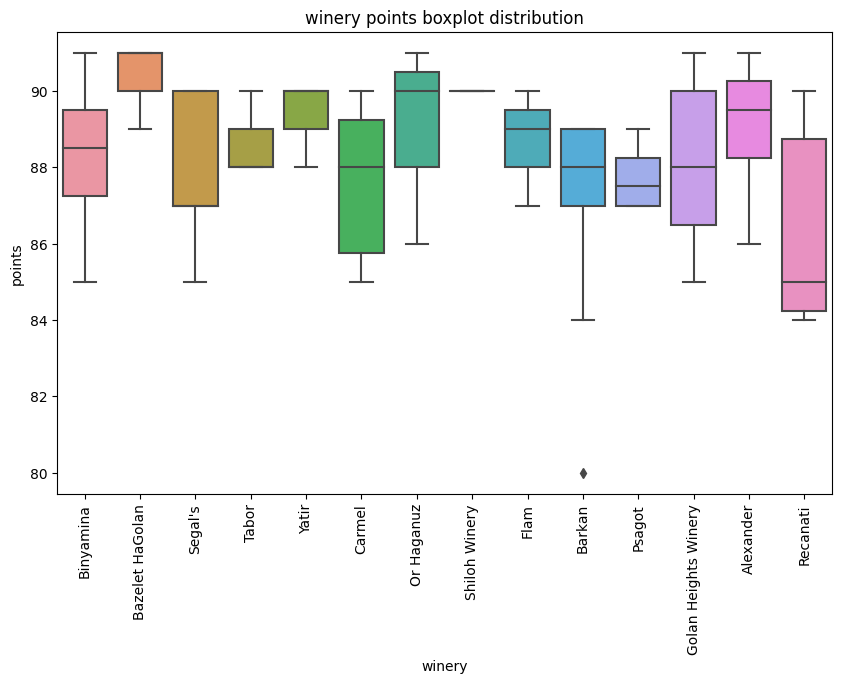

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

_, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='winery', y='points', data=israeli_wines, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(title='winery points boxplot distribution');

#### 3.

In [123]:
cabarne_df = israeli_wines[israeli_wines.variety == 'Cabernet Sauvignon']
cabarne_df.head()

,country,description,designation,points,price,region_1,region_2,variety,winery
81,Israel,"Dark red violet in color, this wine has aromas...",Reserve,91,25.0,NaN,NaN,Cabernet Sauvignon,Binyamina
355,Israel,Restrained aromas of black plum barely set the...,NaN,91,40.0,NaN,NaN,Cabernet Sauvignon,Bazelet HaGolan
966,Israel,"This wine is dark red-violet color to the eye,...",Special Reserve,90,20.0,NaN,NaN,Cabernet Sauvignon,Segal's
970,Israel,"Dark garnet in the glass, this wine has a nose...",Mt. Tabor,90,15.0,NaN,NaN,Cabernet Sauvignon,Tabor
977,Israel,"Dark black cherry in color, this wine offers a...",NaN,90,55.0,NaN,NaN,Cabernet Sauvignon,Yatir


In [124]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA Test
model = ols('points ~ winery', data=cabarne_df).fit()
anova = sm.stats.anova_lm(model, typ=2)
anova

,sum_sq,df,F,PR(>F)
winery,83.235762,13.0,1.33827,0.21891
Residual,272.707900,57.0,NaN,NaN


**$H_0:$ all wineries create similar quality Cabarnet**

It looks like the wineries themselves might have an effect on the quality of the wine, thought it is not VERY significant statistically (wouldn't reject $H_0$ for a $0.05$ threshold)

#### 4. 

In [125]:
import itertools
from math import comb
from scipy.stats import ttest_ind

wineries = cabarne_df.winery.unique()

tests_res = {}
for winery_1, winery_2 in itertools.combinations(wineries, 2):
    Y1 = cabarne_df[cabarne_df.winery == winery_1].points
    Y2 = cabarne_df[cabarne_df.winery == winery_2].points
    tests_res[(winery_1, winery_2)] = ttest_ind(Y1, Y2).pvalue

/var/folders/v6/y2jqltnd6zn79p_4psg6xb780000gp/T/ipykernel_48193/811871077.py:11: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  tests_res[(winery_1, winery_2)] = ttest_ind(Y1, Y2).pvalue


In [128]:
results_df = pd.DataFrame(tests_res, index=['p-value']).T.sort_values('p-value')
above_05 = results_df.where(results_df['p-value'] < 0.05).count()[0]

print(f"Number of pairs with p-value < 0.05: {above_05}, ratio of {above_05/len(results_df):.3f}")

Number of pairs with p-value < 0.05: 4, ratio of 0.044


We would expect some tests to reject $H_0$ since  under the null hypthesis we have about 4% of the tests falsely rejecting the null hypothesis, and the ANOVA test showed us a larger 21% chance of siginficant diffrenece between the winery groups under the null hypothesis

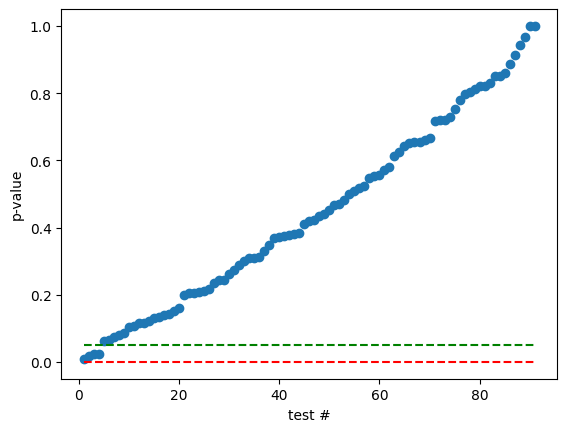

Discovered by Bonferroni:


[]

In [114]:
pv = results_df['p-value'].values.tolist()
m = len(pv)
idcs = np.argsort(pv)
sorted_pvals = np.array(pv)[idcs]

plt.scatter(np.arange(1,len(pv)+1), sorted_pvals)

# Discoveries by Bonferroni's:
alpha = 0.05
plt.plot([1, m], [alpha / m, alpha / m], '--r')
plt.plot([1, m], [alpha, alpha], '--g')
plt.ylabel('p-value')
plt.xlabel('test #')
plt.savefig("Bonf.png")
plt.show()

# Discoveries by BH:
rejected = sorted_pvals * len(sorted_pvals) < .05

print("Discovered by Bonferroni:")
[list(tests_res.keys())[i] for i in idcs[rejected]]

## Problem 5 (contrasts)
#### Continuation of Problem 4

Load the data as in Question 4 (removing duplicates, leaving only samples from winaries of at least 3 samples of variety ``Cabernet Sauvignon``)

Using a single t-test, test the assumption that cabernets in the Golan area wineries: ``Bazelet HaGolan``, ``Golan Heights Winery`` have the same quality as the average of Judean Hills area wineries: ``Katlav``, ``Psagot``, ``Shiloh Winery``, ``Titora``, ``Yatir`` (the goal here is to construct a "contrast", hence you should take an arithmetic average of group averages. Recall that the global vriance estimator is obtained using all data points, not just those involved in the contrast).

Note: you can ignore the ``province`` filed in the data becasue it contains inaccurate information.



In [167]:
import pandas as pd
wine_df = pd.read_csv("data/winemag-data_first150k.csv", index_col=0)
variety = 'Cabernet Sauvignon'
min_per_group = 1
israeli_wines = wine_df[(wine_df.country == 'Israel') & (wine_df.variety == variety)]\
                .filter(['country', 'description','designation', 'points',
                         'price','region_1', 'region_2', 'variety', 'winery'])\
                .replace('Gamla', 'Golan Heights Winery')\
                .drop_duplicates(keep='first')\
                .groupby('winery')\
                .filter(lambda x : len(x) >= min_per_group)


In [190]:
golan_wineries = ['Bazelet HaGolan', 'Golan Heights Winery']
judean_wineries = ['Katlav', 'Psagot', 'Shiloh Winery', 'Titora', 'Yatir']

contrast_wines = israeli_wines[israeli_wines.winery.isin(golan_wineries + judean_wineries)]

n = contrast_wines.shape[0]
k = len(golan_wineries + judean_wineries)

y_bar = contrast_wines.groupby('winery').points.mean()
counts = contrast_wines.groupby('winery').points.count()

ss_wit = contrast_wines.groupby('winery').points.agg(lambda x: np.sum((x - np.mean(x)) ** 2)).sum()
s2 = ss_wit / (n - k)

counts_golan = counts[golan_wineries]
counts_judean = counts[judean_wineries]

y_bar_golan = y_bar[golan_wineries].mean()
y_bar_judean = y_bar[judean_wineries].mean()

p = (y_bar_judean - y_bar_golan) / np.sqrt(
        s2 * (
        (1/len(counts_golan)**2) * (1/counts_golan).sum() + 
        (1/len(counts_judean)**2) * (1/counts_judean).sum())
    )

print(f"t statistic value: {p:.3f}")

from scipy.stats import t
# p-value
p_value = t.cdf(p, df=n-k)
print(f"p-value: {p_value:.3f}")


t statistic value: -1.817
p-value: 0.045


We see that the Judean Wineries produce better quality wine than the Golan ones, with a p-value of 0.045, which means we reject $H_0$: the area proprety has no effect on the quality of the wine, with a threshold of 0.05